#### Summer of Reproducibility - noWorkflow Base Experiment - Notebook 3
This Jupyter Notebook is dedicated to guiding you through the applications of noWorkflow in Data Science and Machine Learning. It is the outcome of our participation in the Summer of Reproducibility at OSPO UCSC 2023, utilizing [noWorkflow](https://github.com/gems-uff/noworkflow).

This Notebook serves as a use case based on the problem of Fraud Detection. We have partially replicated the work entitled "The Effect of Feature Extraction and Data Sampling on Credit Card Fraud Detection." Interested readers are encouraged to refer to the original paper [here](https://link.springer.com/article/10.1186/s40537-023-00684-w).

For the sake of clarity, we have divided this experiment into different notebooks:

1. Covers the steps from reading the dataset to a Random Forest model training, configuring a single trial.
2. Repeats all previous steps but with changes in the experimental setup, such as modified hyperparameters.
3. Utilizes noWorkflow to summarize the results from previous trials.
4. Repeat the experiment, changing the model and the order of operations.
5. Compares the modifications and differences between the last and first experiments.

**Please, remember to select the noWorkflow kernel before running these Notebooks.**

In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

from noworkflow.now.tagging.var_tagging import backward_deps, \
    global_backward_deps, store_operations, resume_trials, trial_diff, \
    trial_intersection_diff, var_tag_plot, var_tag_values

## Comparision Notebook

We have the experiments executed in past two notebooks and available to be compared. Just remembering the trial ids of both:

In [2]:
list_id = resume_trials()
list_id

['edb94455-f97b-46f0-b30e-ed01eaf81081',
 'b86773c3-a3b7-40d0-a3ac-5ab4278826c2']

### Comparing the common operations in both trials

In order to examine the paired numerical values in both trials, the *trial_intersecction_diff* displays the results of correspondent operations in both trials. In the case that one operation is not present in one trial, it will be ignored in this comparision.

In the follwing output we can see that pca_components changed from 3 to 5, the size of test_dim went from 0.2 to 0.3. However, the values of y_test, y_pred, among other, are not available given they are numpy matrices and vectors. This feature is in our backlog.

In [3]:
trial_intersection_diff(list_id[0], list_id[-1])

,key,81081,826c2
0,"now_variable('roc_metric', roc_auc_score(y_tes...",0.817305710162853,0.9254794520547944
1,X_resampled,complex data type,complex data type
2,y_pred,complex data type,complex data type
3,pca,PCA(n_components=3),PCA(n_components=5)
4,y,complex data type,complex data type
5,pca_components,3,5
6,rus,complex data type,complex data type
7,"roc_auc_score(y_test, y_pred)",0.817305710162853,0.9254794520547944
8,df['Class'],complex data type,complex data type
9,y_test,complex data type,complex data type


### Comparing operations and its order in both trials

Here is the second way into displaying differences. The values of variables and function calls are exhibited in a diff file format, emphasizing the order of the operations carried out. The goal here is to show anything that went different between the two trials. 

In [4]:
trial_diff(list_id[0], list_id[-1])

f,1,"y_test, complex data type",f,1,"y_test, complex data type"
,2,"RandomForestClassifier(), complex data type",,2,"RandomForestClassifier(), complex data type"
,3,"now_variable('model', RandomForestClassifier()), complex data type",,3,"now_variable('model', RandomForestClassifier()), complex data type"
,4,"rf, complex data type",,4,"rf, complex data type"
,5,"X_resampled, complex data type",,5,"X_resampled, complex data type"
,6,"RandomUnderSampler(random_state=random_seed), complex data type",,6,"RandomUnderSampler(random_state=random_seed), complex data type"
,7,"rus, complex data type",,7,"rus, complex data type"
n,8,"now_variable('pca_components', 3), 3",n,8,"now_variable('pca_components', 5), 5"
,9,"pca_components, 3",,9,"pca_components, 5"
,10,"PCA(n_components=pca_components), PCA(n_components=3)",,10,"PCA(n_components=pca_components), PCA(n_components=5)"
,11,"pca, PCA(n_components=3)",,11,"pca, PCA(n_components=5)"


### var_tag_plot

Charting the values of all values of a tagged variable. In this examples, *roc_fr* and *f1_rf*.

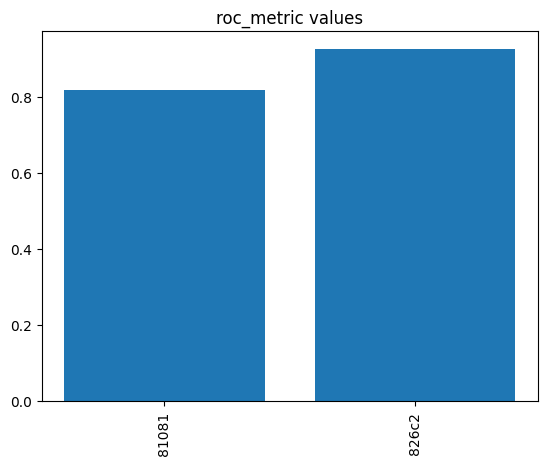

In [5]:
var_tag_plot('roc_metric')

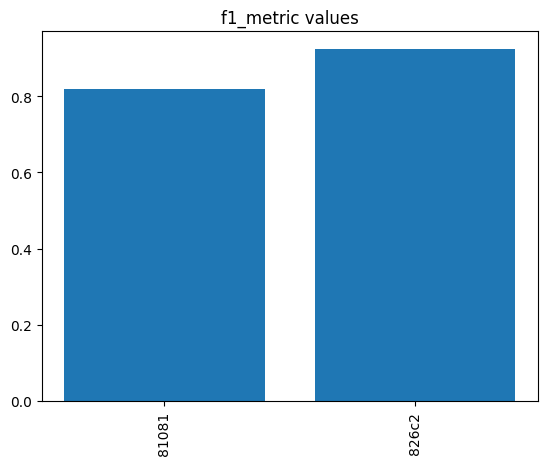

In [6]:
var_tag_plot('f1_metric')

### var_tag_values

Retrieving the values of the same tagged variables in a pandas dataframe. In the examples, *roc_rf* and *model* name.

In [7]:
var_tag_values('roc_metric')

,trial_id,short_trial_id,tag,value
0,edb94455-f97b-46f0-b30e-ed01eaf81081,81081,roc_metric,0.817305710162853
1,b86773c3-a3b7-40d0-a3ac-5ab4278826c2,826c2,roc_metric,0.9254794520547944


In [8]:
var_tag_values('model')

,trial_id,short_trial_id,tag,value
0,edb94455-f97b-46f0-b30e-ed01eaf81081,81081,model,RandomForestClassifier()
1,b86773c3-a3b7-40d0-a3ac-5ab4278826c2,826c2,model,RandomForestClassifier()


### Next steps

The next [Notebook](./now_usecase_part_4.ipynb) we will implement a new experimental setup changing the order of feature transformations and changing the model.